In [1]:
# Import libraries
import numpy as np;
import pandas as pd;
import matplotlib.pyplot as plt;
import seaborn as sns;

In [2]:
# Import data from excel files
df1 = pd.read_excel('Formative Assessment I_class_UKG.xlsx');
df2 = pd.read_excel('Formative Assessment-2_class_UKG.xlsx');
df3 = pd.read_excel('Half Yearly Exam_class_UKG.xlsx');

# Merge the dataframes
df = pd.concat([df1, df2, df3], ignore_index=True);

# print the head
df.head()

,Academic session,Exam Name,Exam Mode,Subject Name,Subject Status,Full Mark,Pass Mark,Negative Percentage,Student Name,Class,Section,Roll No,Marks Secured,Result
0,2022-2023,Formative Assessment I,Offline,Hindi,Evaluating,25,7,0 %,Rupam Sukla,UKG,A,1,18.0,Pass
1,2022-2023,Formative Assessment I,Offline,EVS,Evaluating,25,7,0 %,Rupam Sukla,UKG,A,1,14.0,Pass
2,2022-2023,Formative Assessment I,Offline,Oral Maths,Evaluating,10,3,0 %,Rupam Sukla,UKG,A,1,8.0,Pass
3,2022-2023,Formative Assessment I,Offline,Oral English,Evaluating,10,3,0 %,Rupam Sukla,UKG,A,1,7.0,Pass
4,2022-2023,Formative Assessment I,Offline,Drawing,Evaluating,25,7,0 %,Rupam Sukla,UKG,A,1,22.0,Pass


In [3]:
# Get all the Subject names
subjects = df['Subject Name'].unique();

# Get all the students
students = df['Student Name'].unique();

# Get all the Exam names
exams = df['Exam Name'].unique();

In [4]:
# Create a new dataframe for students data
df_new = pd.DataFrame(students, columns=['Student Name']);

# Loop through all the students
for student in students:
    # Find the first row of the student in the dataframe
    row = df.loc[df['Student Name'] == student].iloc[0];
    # Add the Class, Section, Roll No to the new dataframe
    df_new.loc[df_new['Student Name'] == student, 'Class'] = row['Class'];
    df_new.loc[df_new['Student Name'] == student, 'Section'] = row['Section'];
    df_new.loc[df_new['Student Name'] == student, 'Roll No'] = row['Roll No'];

df_new.head()

,Student Name,Class,Section,Roll No
0,Rupam Sukla,UKG,A,1.0
1,Ipsita Das,UKG,A,2.0
2,Md.Sanawaj,UKG,A,3.0
3,Ayushi kundu,UKG,A,4.0
4,Jiya Rongpi,UKG,A,5.0


In [5]:
# Add columns for each exam and subject
for exam in exams:
    for subject in subjects:
        df_new[exam + '_' + subject] = 0;
        df_new[exam + '_' + subject + '_total'] = 0;
        df_new[exam + '_' + subject + '_pass'] = 0;


df_new.head()      

,Student Name,Class,Section,Roll No,Formative Assessment I_Hindi,Formative Assessment I_Hindi_total,Formative Assessment I_Hindi_pass,Formative Assessment I_EVS,Formative Assessment I_EVS_total,Formative Assessment I_EVS_pass,...,Half Yearly Exam_Maths_pass,Half Yearly Exam_English,Half Yearly Exam_English_total,Half Yearly Exam_English_pass,Half Yearly Exam_Rhymes,Half Yearly Exam_Rhymes_total,Half Yearly Exam_Rhymes_pass,Half Yearly Exam_Oral Hindi,Half Yearly Exam_Oral Hindi_total,Half Yearly Exam_Oral Hindi_pass
0,Rupam Sukla,UKG,A,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Ipsita Das,UKG,A,2.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Md.Sanawaj,UKG,A,3.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Ayushi kundu,UKG,A,4.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Jiya Rongpi,UKG,A,5.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
# Add marks to the new dataframe
for student in students:
    for exam in exams:
        for subject in subjects:
            # full marks
            full_mark = df.loc[(df['Exam Name'] == exam) & (df['Subject Name'] == subject), 'Full Mark'].iloc[0];
            # pass marks
            pass_mark = df.loc[(df['Exam Name'] == exam) & (df['Subject Name'] == subject), 'Pass Mark'].iloc[0];
            # Check if the row of the student esist in the dataframe
            if df.loc[(df['Student Name'] == student) & (df['Exam Name'] == exam) & (df['Subject Name'] == subject)].empty:
                # If it doesn't exist, add 0 to the new dataframe
                df_new.loc[df_new['Student Name'] == student, exam + '_' + subject] = 0;
                df_new.loc[df_new['Student Name'] == student, exam + '_' + subject + '_total'] = full_mark;
                df_new.loc[df_new['Student Name'] == student, exam + '_' + subject + '_pass'] = pass_mark;
            else:
                # If it exists, get the row
                row = df.loc[(df['Student Name'] == student) & (df['Exam Name'] == exam) & (df['Subject Name'] == subject)].iloc[0];
                # Add the marks to the new dataframe
                df_new.loc[df_new['Student Name'] == student, exam + '_' + subject] = row['Marks Secured'];
                df_new.loc[df_new['Student Name'] == student, exam + '_' + subject + '_total'] = full_mark;
                df_new.loc[df_new['Student Name'] == student, exam + '_' + subject + '_pass'] = pass_mark;
df_new.head()

,Student Name,Class,Section,Roll No,Formative Assessment I_Hindi,Formative Assessment I_Hindi_total,Formative Assessment I_Hindi_pass,Formative Assessment I_EVS,Formative Assessment I_EVS_total,Formative Assessment I_EVS_pass,...,Half Yearly Exam_Maths_pass,Half Yearly Exam_English,Half Yearly Exam_English_total,Half Yearly Exam_English_pass,Half Yearly Exam_Rhymes,Half Yearly Exam_Rhymes_total,Half Yearly Exam_Rhymes_pass,Half Yearly Exam_Oral Hindi,Half Yearly Exam_Oral Hindi_total,Half Yearly Exam_Oral Hindi_pass
0,Rupam Sukla,UKG,A,1.0,18.0,25,7,14,25,7,...,15,34.5,50,15,40,50,15,18,30,9
1,Ipsita Das,UKG,A,2.0,25.0,25,7,25,25,7,...,15,47.5,50,15,30,50,15,30,30,9
2,Md.Sanawaj,UKG,A,3.0,6.0,25,7,5,25,7,...,15,7.0,50,15,10,50,15,13,30,9
3,Ayushi kundu,UKG,A,4.0,20.5,25,7,24,25,7,...,15,38.0,50,15,50,50,15,29,30,9
4,Jiya Rongpi,UKG,A,5.0,21.0,25,7,11,25,7,...,15,36.5,50,15,40,50,15,14,30,9


In [7]:
# Add weightage column for each subject
for subject in subjects:
    df_new['Weightage ' + subject] = np.nan;

df_new.head()

,Student Name,Class,Section,Roll No,Formative Assessment I_Hindi,Formative Assessment I_Hindi_total,Formative Assessment I_Hindi_pass,Formative Assessment I_EVS,Formative Assessment I_EVS_total,Formative Assessment I_EVS_pass,...,Half Yearly Exam_Oral Hindi_pass,Weightage Hindi,Weightage EVS,Weightage Oral Maths,Weightage Oral English,Weightage Drawing,Weightage Maths,Weightage English,Weightage Rhymes,Weightage Oral Hindi
0,Rupam Sukla,UKG,A,1.0,18.0,25,7,14,25,7,...,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Ipsita Das,UKG,A,2.0,25.0,25,7,25,25,7,...,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Md.Sanawaj,UKG,A,3.0,6.0,25,7,5,25,7,...,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Ayushi kundu,UKG,A,4.0,20.5,25,7,24,25,7,...,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Jiya Rongpi,UKG,A,5.0,21.0,25,7,11,25,7,...,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# Calculate the weightage for each subject by taking the 20% from FA1, 20% from FA2 and 180% from Half Yearly
for subject in subjects:
    df_new['Weightage ' + subject] = df_new['Formative Assessment I_' + subject] * 0.2 + df_new['Formative Assessment-2_' + subject] * 0.2 + df_new['Half Yearly Exam_' + subject] * 1.8;
    # Calculate the full weightage for each subject by taking the 20% from FA1, 20% from FA2 and 180% from Half Yearly
    df_new['Weightage ' + subject + ' total'] = df_new['Formative Assessment I_' + subject + '_total'] * 0.2 + df_new['Formative Assessment-2_' + subject + '_total'] * 0.2 + df_new['Half Yearly Exam_' + subject + '_total'] * 1.8;

/tmp/ipykernel_4955/325688772.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_new['Weightage ' + subject + ' total'] = df_new['Formative Assessment I_' + subject + '_total'] * 0.2 + df_new['Formative Assessment-2_' + subject + '_total'] * 0.2 + df_new['Half Yearly Exam_' + subject + '_total'] * 1.8;
/tmp/ipykernel_4955/325688772.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_new['Weightage ' + subject + ' total'] = df_new['Formative Assessment I_' + subject + '_total'] * 0.2 + df_new['Formative Assessment-2_' + su

In [9]:
# Calculate the weightage result for each subject, pass if weightage is greater than 30 else fail
for subject in subjects:
    # get the total full marks for each exam using a loop
    total = 0;
    for exam in exams:
        total += df_new[exam + '_' + subject + '_total'].iloc[0];
    # calculate the weightage result
    df_new['Result ' + subject] = np.where(df_new['Weightage ' + subject] >= total * 0.3, 'Pass', 'Fail');

/tmp/ipykernel_4955/3271036695.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_new['Result ' + subject] = np.where(df_new['Weightage ' + subject] >= total * 0.3, 'Pass', 'Fail');
/tmp/ipykernel_4955/3271036695.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_new['Result ' + subject] = np.where(df_new['Weightage ' + subject] >= total * 0.3, 'Pass', 'Fail');
/tmp/ipykernel_4955/3271036695.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which h

In [10]:
# Add a total column for the weightage
df_new['Total Weightage'] = 0;

# Calculate the total weightage using a loop of all the subjects
for subject in subjects:
    df_new['Total Weightage'] += df_new['Weightage ' + subject];

df_new.head()

/tmp/ipykernel_4955/106921885.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_new['Total Weightage'] = 0;


,Student Name,Class,Section,Roll No,Formative Assessment I_Hindi,Formative Assessment I_Hindi_total,Formative Assessment I_Hindi_pass,Formative Assessment I_EVS,Formative Assessment I_EVS_total,Formative Assessment I_EVS_pass,...,Result Hindi,Result EVS,Result Oral Maths,Result Oral English,Result Drawing,Result Maths,Result English,Result Rhymes,Result Oral Hindi,Total Weightage
0,Rupam Sukla,UKG,A,1.0,18.0,25,7,14,25,7,...,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,570.7
1,Ipsita Das,UKG,A,2.0,25.0,25,7,25,25,7,...,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,684.1
2,Md.Sanawaj,UKG,A,3.0,6.0,25,7,5,25,7,...,Fail,Fail,Pass,Pass,Fail,Fail,Fail,Fail,Pass,197.4
3,Ayushi kundu,UKG,A,4.0,20.5,25,7,24,25,7,...,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,632.6
4,Jiya Rongpi,UKG,A,5.0,21.0,25,7,11,25,7,...,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,566.0


In [11]:
# Add a result column
df_new['Result'] = '';

# Function to add all weightage subject total
def add_total_weightage(row):
    total = 0;
    for subject in subjects:
        total += row['Weightage ' + subject + ' total'];
    return total;


# Add the total marks column
df_new['Total Marks'] = df_new.apply(add_total_weightage, axis=1);

# Calculate the percentage
df_new['Percentage'] = df_new['Total Weightage'] / df_new['Total Marks'] * 100;

# Pass if total weightage is greater than 30% of total full marks
df_new.loc[df_new['Total Weightage'] >= df_new['Total Marks'] * 0.3, 'Result'] = 'Pass';

# Fail if total weightage is less than 30% of total full marks
df_new.loc[df_new['Total Weightage'] < df_new['Total Marks'] * 0.3, 'Result'] = 'Fail';

/tmp/ipykernel_4955/19931101.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_new['Result'] = '';


In [12]:
# Calculate the rank
df_new['Rank'] = df_new['Percentage'].rank(ascending=False);

In [13]:
# Print the first row
df_new.iloc[0]

Student Name                    Rupam Sukla
Class                                   UKG
Section                                   A
Roll No                                 1.0
Formative Assessment I_Hindi           18.0
                                   ...     
Total Weightage                       570.7
Result                                 Pass
Total Marks                           774.0
Percentage                         73.73385
Rank                                    8.0
Name: 0, Length: 117, dtype: object

In [14]:
df_new

,Student Name,Class,Section,Roll No,Formative Assessment I_Hindi,Formative Assessment I_Hindi_total,Formative Assessment I_Hindi_pass,Formative Assessment I_EVS,Formative Assessment I_EVS_total,Formative Assessment I_EVS_pass,...,Result Drawing,Result Maths,Result English,Result Rhymes,Result Oral Hindi,Total Weightage,Result,Total Marks,Percentage,Rank
0,Rupam Sukla,UKG,A,1.0,18.0,25,7,14,25,7,...,Pass,Pass,Pass,Pass,Pass,570.70,Pass,774.0,73.733850,8.0
1,Ipsita Das,UKG,A,2.0,25.0,25,7,25,25,7,...,Pass,Pass,Pass,Pass,Pass,684.10,Pass,774.0,88.385013,3.0
2,Md.Sanawaj,UKG,A,3.0,6.0,25,7,5,25,7,...,Fail,Fail,Fail,Fail,Pass,197.40,Fail,774.0,25.503876,18.0
3,Ayushi kundu,UKG,A,4.0,20.5,25,7,24,25,7,...,Pass,Pass,Pass,Pass,Pass,632.60,Pass,774.0,81.731266,6.0
4,Jiya Rongpi,UKG,A,5.0,21.0,25,7,11,25,7,...,Pass,Pass,Pass,Pass,Pass,566.00,Pass,774.0,73.126615,10.0
5,Niraj pradhan,UKG,A,6.0,14.0,25,7,8,25,7,...,Pass,Pass,Pass,Pass,Pass,436.70,Pass,774.0,56.421189,15.0
6,Anushka Brijbashi,UKG,A,7.0,22.5,25,7,4,25,7,...,Pass,Pass,Pass,Pass,Pass,597.20,Pass,774.0,77.157623,7.0
7,Ringchen Tamang,UKG,A,8.0,25.0,25,7,23,25,7,...,Pass,Pass,Pass,Pass,Pass,723.60,Pass,774.0,93.488372,2.0
8,Andrea Hazarika,UKG,A,9.0,23.0,25,7,13,25,7,...,Pass,Pass,Pass,Pass,Pass,672.70,Pass,774.0,86.912145,4.0
9,Franki Islam,UKG,A,10.0,13.0,25,7,3,25,7,...,Pass,Pass,Fail,Pass,Pass,415.80,Pass,774.0,53.720930,17.0


In [15]:
# Export the dataframe to excel
df_new.to_excel('Result.xlsx', index=False);

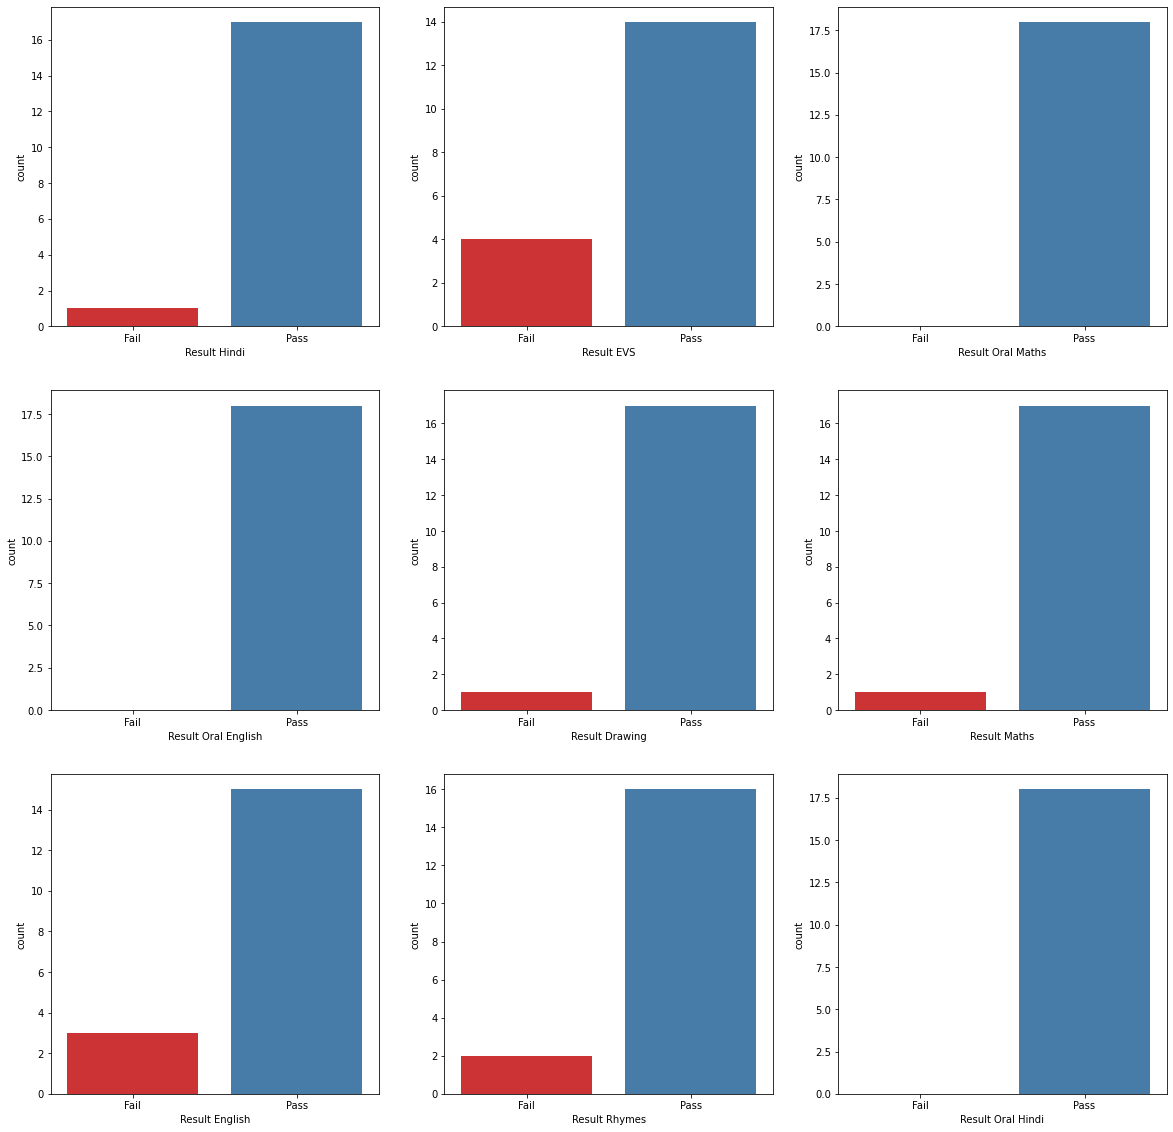

In [20]:
# Combine the charts in one figure
fig, axes = plt.subplots(3, 3, figsize=(20, 20));
for i, subject in enumerate(subjects):
    sns.countplot(x='Result ' + subject, data=df_new, palette='Set1', order=['Fail', 'Pass'], ax=axes[i // 3, i % 3]);
plt.show();